In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review: Comparing Two Samples

In [2]:
births = Table.read_table('baby.csv')

In [3]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [4]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')   

In [5]:
births.select("Maternal Smoker","Birth Weight").group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


# Randomized Control Experiment

In [6]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


How can we easily see how many people were in each category?

In [7]:
botox.pivot('Result', 'Group')

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


Group,0.0,1.0
Control,14,2
Treatment,6,9


Find the average result for each group

In [8]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


# Testing the Hypothesis

What's our test statistic here? What is the observed test statistic?

In [9]:
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff

0.475

Simulate one test statistic

In [10]:
one_simulated_difference(botox, 'Result', 'Group')

-0.3

Store 1000 simulated test statistics in an array called `simulated_diffs`

In [11]:
simulated_diffs = make_array()

for i in np.arange(1000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

Visualize `simulated_diffs`

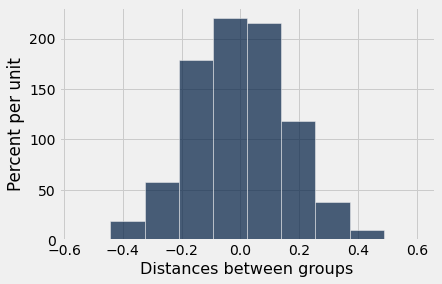

In [12]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)

Find the p-value

In [13]:
np.count_nonzero(simulated_diffs >= observed_diff)/len(simulated_diffs)

0.013

In [14]:
# flipping 100 coins
# null: coin is fair
# alternative: coin is biased towards heads
# test statistics: number of heads
# 60, 80, 85, 90 -> as number increase more towards our alternative
# larger values support alternative -> right tail

In [15]:
# smokers/non-smokers
# null: same underlying distributions
# alt: mothers who smoke have babies that have lower weight
# test stat: mean weight smokers - mean weight non-smokers
# smokers: 2, non-smokers: 14 ===> -12
# -9.26
# smaller values support alternative --> left tail